# First Data Analyse Project 😃

## Prison Break - Helicopter Escapes

This is the first project for data analyse. There are plenty helper funcitons to avoid using advanced package, such as `numpy` and `pandas`. We keep using native functions to achieve the goal for practicing the basics.

In this project, We will answer the folloing questions:
1. In which year did the ost helicopter prison break attempts occur?
2. In which countries do the most attempted helicopter prison breaks occur?
---

First of all, we need some helper functions to deal with the first project.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def data_from_url(url):
    df = pd.read_html(url)[1]
    lol = df.to_numpy().tolist()
    return lol

def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])

def barplot(list_of_2_element_list):
    d = {ya[0]:ya[1] for ya in list_of_2_element_list}
    plt.figure(figsize=(9,15))
    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.show()

def unique_countries(countries):
    s = pd.Series(countries)
    return list(s.unique())

def display_no_index(df):
    display(HTML(df.to_html(index=False)))
    
def print_pretty_table(countries_frequency):
    countries = df.Country.value_counts().index
    occurrences = df.Country.value_counts().values
    d = {"Country": countries, "Number of Occurrences": occurrences}
    display_no_index(pd.DataFrame(d))

# df = pd.read_html("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")[1]
# df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'

In [3]:
data = data_from_url(url)

Let's print the first three rows and see what they are

In [4]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

## Removing the Details
We initialize an `index` variable with the value of 0. The purpose of this variable is to help us track which row we're modifying.

In [5]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

Let's check if the last column is removed.

In [6]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


## Extracting the Year
In the code cell below, we iterate over data using the iterable variable row and: 
* With every occurrence of `row[0]`, we refer to the first entry of row, i.e., the date. 
* Thus, with `date = fetch_year(row[0])`, we're extracting the year out of the date in `row[0]` and assiging it to the variable date. 
* We then replace the value of `row[0]` with the year that we just extracted.

In [7]:
for row in data:
    row[0] = fetch_year(row[0])
    
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


## Attempts per Year

In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Before we move on, let's check what are the earliest and latest dates we have in our dataset.

In [9]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison break attempts there were for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [10]:
attempts_per_years = []
for y in range(min_year, max_year + 1):
    attempts_per_years.append([y,0])

print(attempts_per_years)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


Now we create a list where each element looks like `[year, 0]`.

To determine how many attempts there were in each year, we will create a loop within a loop, then increment the second entry (the one on index 1 which starts out as being 0) by 1 each time a year appears in the data.

In [11]:
for row in data:
    for year_attempt in attempts_per_years:
        if row[0] == year_attempt[0]:
            year_attempt[1] += 1
print (attempts_per_years)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


It would be better if we could visualize it in a friendlier way. `matplotlib` can help in this case.

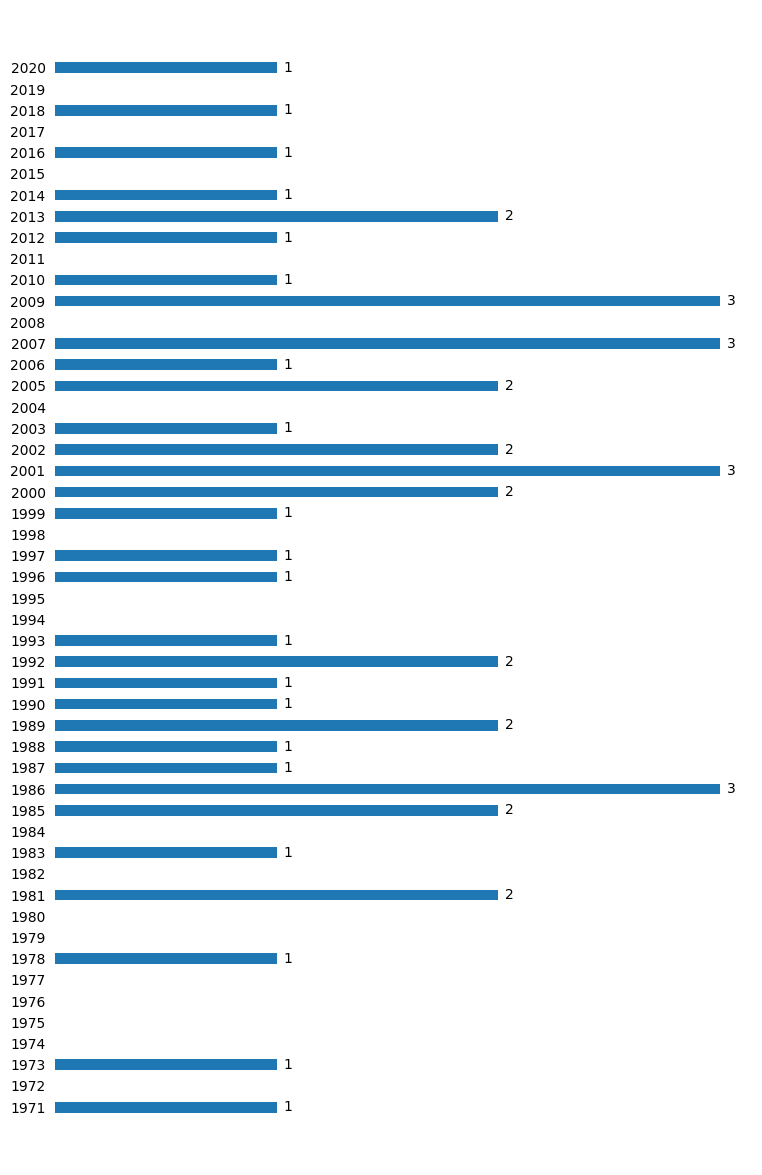

In [12]:
%matplotlib inline
barplot(attempts_per_years)

The years in which the most helicopter prison break attempts occurred were 1986, 2001, 2007 and 2009, with a total of six attempts each.

## Attempts by Country

We can use the dictionary to do it for countries.

In [13]:
countries = {}
for row in data:
    if row[2] not in countries:
        countries[row[2]] = 1
    else:
        countries[row[2]] += 1

In [14]:
print(countries)

{'Mexico': 1, 'Ireland': 1, 'United States': 8, 'France': 15, 'Canada': 4, 'Australia': 2, 'Brazil': 2, 'Italy': 1, 'United Kingdom': 2, 'Puerto Rico': 1, 'Chile': 1, 'Netherlands': 1, 'Greece': 4, 'Belgium': 4, 'Russia': 1}


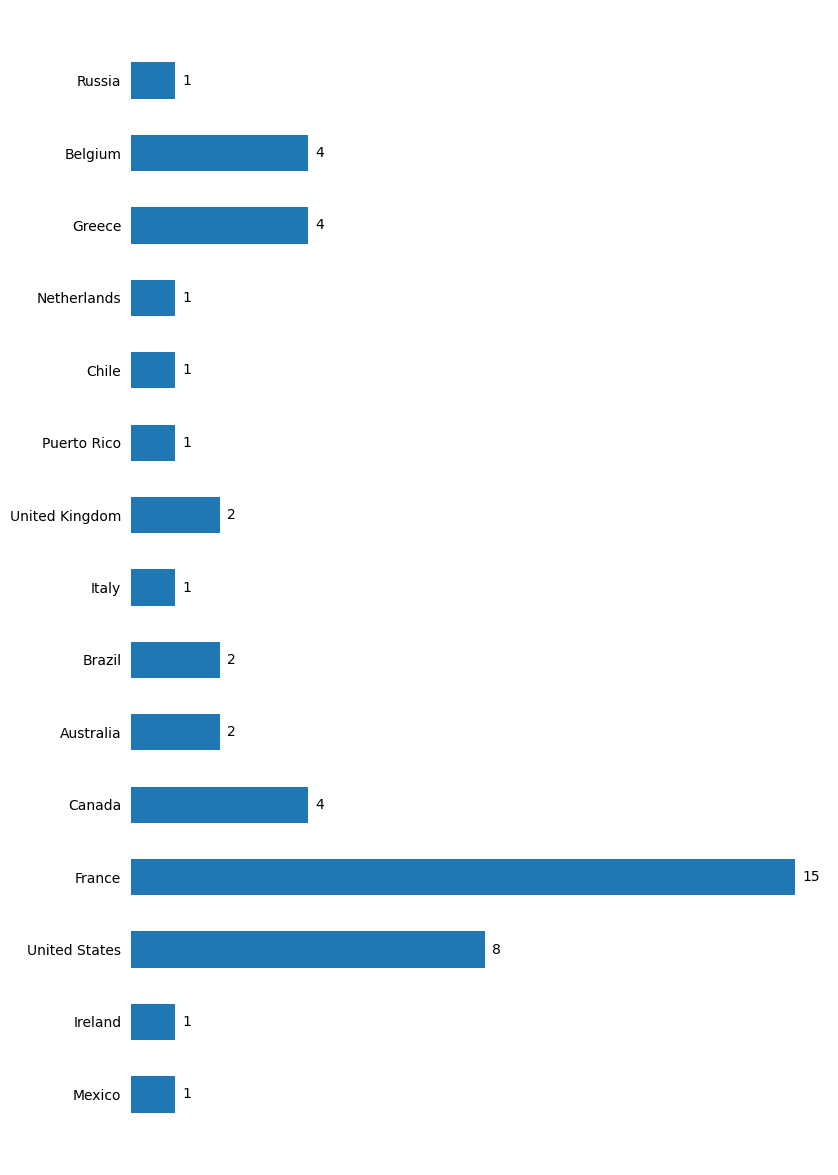

In [15]:
countries_frequency = []

for key, value in countries.items():
    countries_frequency.append([key,value])

barplot(countries_frequency)

It is clearly showing that the most attempted helicopter prison breaks occur in France, in total 15 attempts.